In [2]:
%pylab inline
from sys import platform
from tqdm import trange
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

if platform == "win32":
    path = 'C:/Users/olive/'
elif platform == "darwin":
    path = '~/'

%run SentimentAnalysis.ipynb
%run TermSelection.ipynb

Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ollyjc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ollyjc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ollyjc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
### LOADS PROCESSED DATA

c_df = pd.read_pickle(path + 'OneDrive - Cardiff University/Individual Project/processed data/comments.csv')
s_df = pd.read_pickle(path + 'OneDrive - Cardiff University/Individual Project/processed data/submissions.csv')

s_df = s_df.sort_values(by='datetime')
c_df = c_df.sort_values(by='datetime')

In [5]:
c_df.sample(5)

,datetime,body,processed_text,sentiment,compound_score,submission_id,parent_id
id,,,,,,,
g0vci5o,2020-08-09 08:02:01,"Sorry, I really can't understand what your poi...",sorry i really can't understand what your poin...,positive,0.1406,i5xu11,t1_g0v62ms
g4u0wvn,2020-09-11 16:46:15,Unfortunately it really doesn't matter if the ...,unfortunately it really doesn't matter if the ...,positive,0.8247,iqssny,t1_g4tzvec
gczjff4,2020-11-20 22:18:41,Well yes that is the way of the world. We are ...,well yes that is the way of the world we are s...,positive,0.9001,jxqd3e,t1_gczfu5p
g6asizh,2020-09-23 08:57:19,"Technically, some strains of the cold are a co...",technically some strains of the cold are a cor...,negative,-0.4707,iy0fd8,t1_g6ap93a
fllkkdh,2020-03-26 22:36:17,When I first saw this advertised I felt like n...,when i first saw this advertised i felt like n...,positive,0.4767,fpl020,t3_fpl020


In [6]:
### PRINTS COMMNET COUNT PER DAY OVER TIME

comment_count = c_df['datetime'].dt.date.value_counts()
submission_count = s_df['datetime'].dt.date.value_counts()

submission_count = submission_count.sort_index(ascending=True)
comment_count = comment_count.sort_index(ascending=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(comment_count)

2020-02-11     105
2020-02-12     399
2020-02-13     249
2020-02-14     303
2020-02-15     254
2020-02-16     125
2020-02-17     167
2020-02-18     122
2020-02-19      59
2020-02-20      60
2020-02-21      82
2020-02-22      97
2020-02-23     133
2020-02-24     167
2020-02-25     147
2020-02-26     206
2020-02-27     327
2020-02-28     311
2020-02-29     285
2020-03-01     389
2020-03-02     661
2020-03-03     719
2020-03-04    1044
2020-03-05    1427
2020-03-06    1515
2020-03-07    1351
2020-03-08    1741
2020-03-09    1935
2020-03-10    2024
2020-03-11    2327
2020-03-12    3482
2020-03-13    3211
2020-03-14    3707
2020-03-15    4008
2020-03-16    3765
2020-03-17    3233
2020-03-18    3104
2020-03-19    3091
2020-03-20    2718
2020-03-21    2723
2020-03-22    3186
2020-03-23    3863
2020-03-24    2952
2020-03-25    2910
2020-03-26    2571
2020-03-27    2312
2020-03-28    2413
2020-03-29    2489
2020-03-30    2530
2020-03-31    2203
2020-04-01    2290
2020-04-02    2200
2020-04-03  

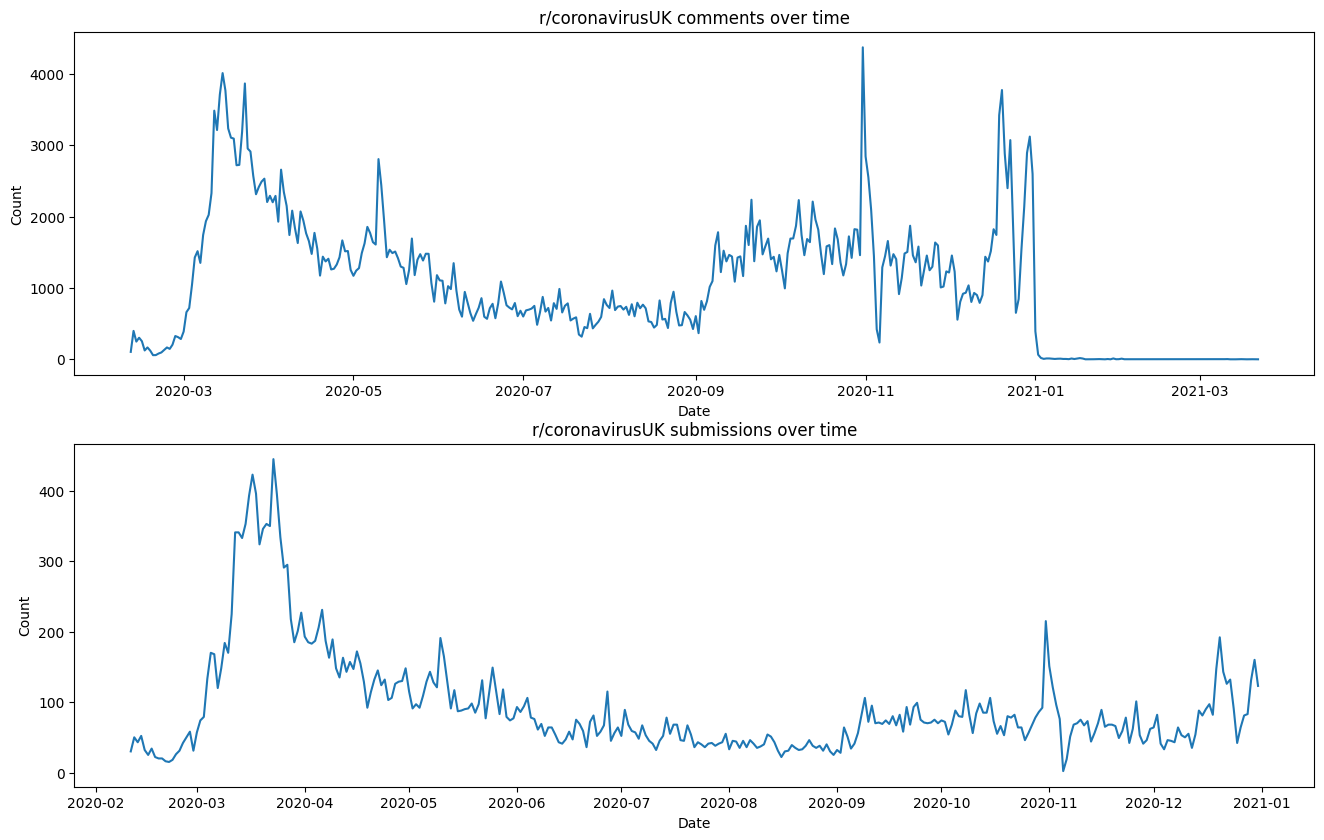

In [7]:
### PLOTTING COMMENTS AND SUBMISSIONS ON r/coronavirusUK OVER TIME

fig, (ax1, ax2) = plt.subplots(2, dpi=100)
fig.set_size_inches(16, 10)

ax1.set_title('r/coronavirusUK comments over time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count')
ax1.plot(comment_count.index, comment_count.values)

ax2.set_title('r/coronavirusUK submissions over time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Count')
ax2.plot(submission_count.index, submission_count.values)

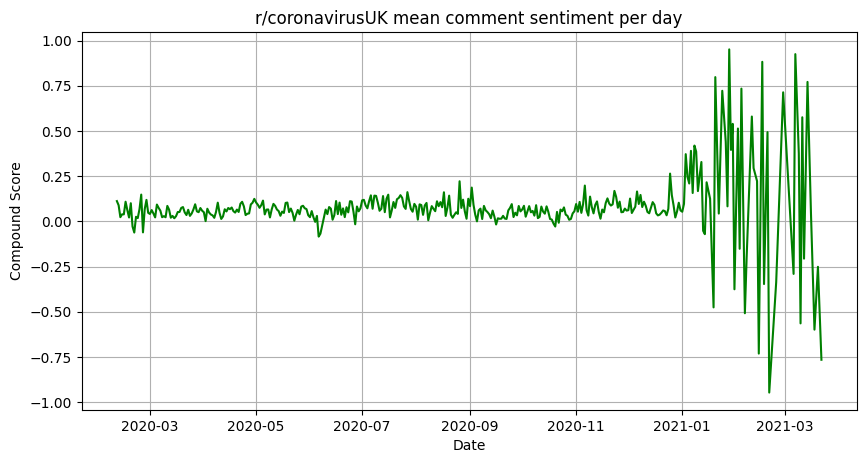

In [8]:
### PLOTTING MEAN SENTIMENT OF ALL COMMENTS PER DAY OVER TIME

comments = c_df.groupby(
    c_df['datetime'].dt.date
).agg(
    {
        'compound_score': mean
    }
)

fig, axs = plt.subplots(1, dpi=100)
fig.set_size_inches(10, 5)

axs.set_title('r/coronavirusUK mean comment sentiment per day')
axs.set_xlabel('Date')
axs.set_ylabel('Compound Score')
axs.grid()
axs.plot(comments, 'g')

In [9]:
### SUBMISSION COMPOUND SCORE CALCULATED BY MEAN OF COMMENTS FROM EACH SUBMISSION

agg_sub_compound_score = c_df.groupby(
    c_df['submission_id']
).agg(
    {
        'compound_score': mean
    }
)

### MERGES SUB DATAFRAME WITH MEAN COMPOUND SCORE FOR ALL COMMENTS OF EACH SUBMISSION
s_df = pd.merge(s_df, agg_sub_compound_score, left_index=True, right_index=True)

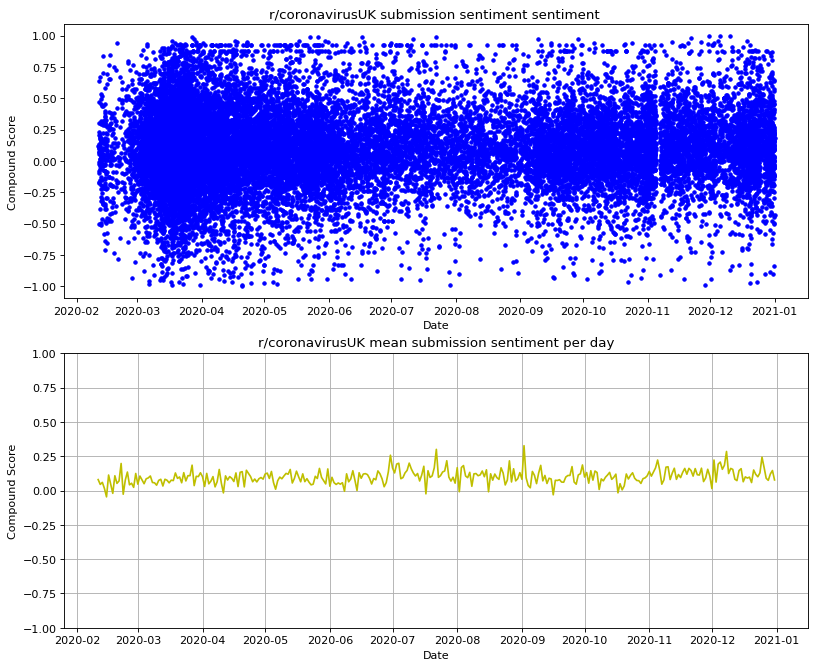

In [10]:
### PLOTTING SUBMISSION SENTIMENT ON r/coronavirusUK OVER TIME')

daily_submission_score = s_df.groupby(
    s_df['datetime'].dt.date
).agg(
    {
        'compound_score': mean
    }
)

fig, (ax1, ax2) = plt.subplots(2, dpi=80)
fig.set_size_inches(12, 10)

ax1.set_title('r/coronavirusUK submission sentiment sentiment ')
ax1.set_xlabel('Date')
ax1.set_ylabel('Compound Score')
ax1.plot(s_df['datetime'], 
         s_df['compound_score'], 
         'b.')

### PLOTTING MEAN SUBMISSION SENTIMENT PER DAY

ax2.set_title('r/coronavirusUK mean submission sentiment per day')
ax2.set_xlabel('Date')
ax2.set_ylim(top=1.0, bottom=-1.0)
ax2.set_ylabel('Compound Score')
ax2.grid()
ax2.plot(daily_submission_score.index, 
         daily_submission_score['compound_score'], 
         'y')

In [1]:
### PLOTTING SUBMISSION SENTIMENT OF TOP LEVEL COMMENTS ON r/coronavirusUK OVER TIME')

# daily_submission_score = s_df.groupby(
#     s_df['datetime'].dt.date
# ).agg(
#     {
#         'compound_score': mean
#     }
# )

# top_level_comments = c_df.query('parent_id[1] == 3')

In [2]:
# Count No of submissions with low comment count

grouped_comments = c_df.groupby(c_df['submission_id'])
grouped_comments.first(5)
# sub_comment_count.values.max()

# fig, (axs) = plt.subplots(1, dpi=80)
# fig.set_size_inches(16, 10)

# ax1.set_title('r/coronavirusUK comments over time')
# axs.set_xlabel('Submission')
# axs.set_ylabel('Count')
# axs.plot(sub_comment_count.index, sub_comment_count.values)

NameError: name 'c_df' is not defined

In [11]:
### TRANSFORMS COMMENT DATAFRAME INTO DICTIONARY TO BE VECTORIZED

df_to_dict = c_df.copy().reset_index()

df_to_dict['target'] = df_to_dict.apply(lambda x: get_target(x['sentiment']), axis=1)

df_to_dict = df_to_dict.drop(columns=['datetime', 
                                      'sentiment', 
                                      'compound_score', 
                                      'submission_id', 
                                      'parent_id'])

df_dict = {'body': list(df_to_dict['body']), 
           'target': list(df_to_dict['target'])}

<BarContainer object of 25 artists>

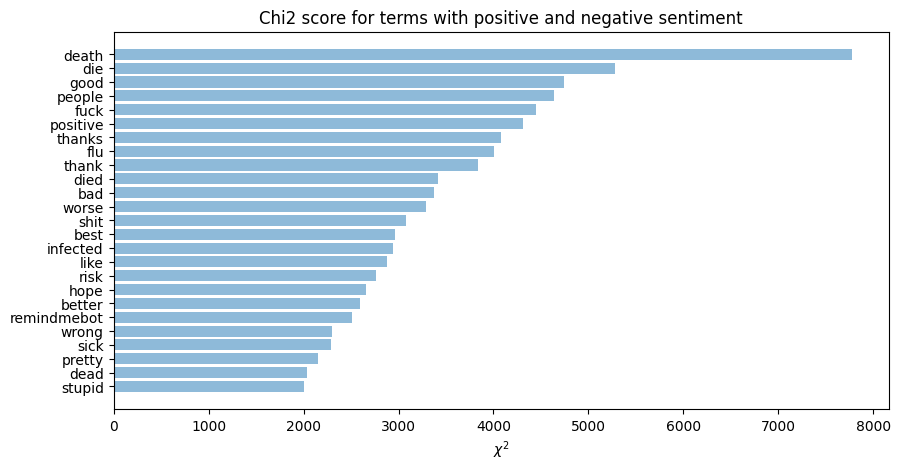

In [12]:
### RETURNS THE TOP N TERMS
topchi2 = document_vectorizer(df_dict, 25)

x = range(len(topchi2[1]))
labels = topchi2[0]

fig, ax1 = plt.subplots(1, dpi=100)
fig.set_size_inches(10, 5)

ax1.set_title('Chi2 score for terms with positive and negative sentiment')
ax1.set_xlabel('$\chi^2$')
ax1.set_yticks(x)
ax1.set_yticklabels(labels)
ax1.barh(x, topchi2[1], align='center', alpha=0.5)

In [ ]:
c_df.sample(10)

In [ ]:
s_df.sample(5)

In [13]:
# e_df = get_emotions(c_df)